In [1]:
#本文是逻辑回归算法实现
import numpy as np
import matplotlib.pyplot as plt

#导入数据
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)

data = load_data('ex2data1.txt')
print data.shape
print data[:5]



X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]



(100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
(100, 2)
(100, 1)
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


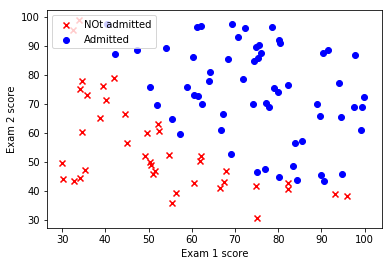

In [2]:
#可视化一下数据集
import matplotlib.pyplot as plt

label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color='r',label = 'NOt admitted')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color='b',label = 'Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper left')
plt.show()




In [3]:
#compute the cost计算cost以及梯度gradient

def sigmoid(x):
    return 1 / (1+np.exp(-x))
def out(x,W):
    return sigmoid(np.dot(x,W))
def compute_cost(X_train,y_train,theta):
    m = X_train.shape[0]
    J = 0
    theta = theta.reshape(-1,1)
    grad = np.zeros((X_train.shape[1],1))
    h = out(X_train,theta)
    J = -1*np.sum(y_train*np.log(h) + (1-y_train)*np.log((1-h))) / m
    grad = X_train.T.dot((h-y_train)) / m
    grad = grad.ravel()
    
    return J,grad


#test the grad，用简单的数值测试一下，编写的代码是否计算正确

m = X.shape[0]
one = np.ones((m,1))
X = np.hstack((one,data[:,:-1]))
W = np.zeros((X.shape[1],1))

cost,grad = compute_cost(X,y,W)
print cost
print grad

cost1,grad1 = compute_cost(X,y,np.array([[-24],[0.2],[0.2]]))






print 'compute with w=[-24,0.2,0.2]'
print 'Expected cost (approx):0.218....'
print cost1
print 'Expected gradients (approx): [0.04,2.566,0.646]'
print grad1

0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]
compute with w=[-24,0.2,0.2]
Expected cost (approx):0.218....
0.21833019382659777
Expected gradients (approx): [0.04,2.566,0.646]
[0.04290299 2.56623412 2.64679737]
